In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
sns.set()
from sklearn.metrics import accuracy_score, roc_curve, auc
import sklearn
from sklearn import linear_model
import sklearn.linear_model as lm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import sklearn as skl
import statsmodels.formula.api as smf
import torch

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nfriedb1/DS4PH-Capstone-Neta-Xiang/main/DSPH_Capstone_Data.csv")
df = df.drop(df.loc[:, 'Unnamed: 12':'Unnamed: 23'].columns, axis = 1)
df = df.drop(["GEOID", "PTRAF"], axis = 1)
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df = df.drop(labels=[120, 403, 575], axis=0) #deleted rows with NA 
df

,ct,svi_ptile,transit_ptile,asthmavalue,PTRAF_bycensus,No_of_Stops,PTover45m_pct,lungCAvalue,CADvalue,LBWvalue
0,24510010100,0.045690,0.029276,0.087,685.684371,10,24.51,13,0.472,0.131
3,24510010200,0.015230,0.124807,0.082,686.778083,8,54.24,6,0.443,0.462
7,24510010300,0.005076,0.036980,0.082,1074.000000,6,15.38,1,0.313,0.106
9,24510010400,0.076140,0.033898,0.081,1072.952243,15,57.58,7,0.587,0.127
11,24510010500,0.081220,0.101695,0.083,1487.000000,2,50.77,1,0.384,0.176
...,...,...,...,...,...,...,...,...,...,...
635,24510280401,0.208100,0.805855,0.114,1104.810421,8,100.00,19,0.386,0.536
640,24510280402,0.360400,0.998459,0.119,731.266859,1,73.56,1,0.083,0.825
642,24510280403,0.213200,0.257319,0.114,649.600265,20,52.26,17,0.590,0.830
647,24510280404,0.832500,0.445300,0.124,1527.100404,10,52.66,12,0.321,0.853


In [3]:
## LINEAR REGRESSION (MODEL 1) WITH COLLINEARITY ##
# variables: svi_ptile , transit_ptile , PTRAF_bycensus 
# collinearity present (transit_ptile and PTRAF_bycensus are collinear) 

In [54]:
y_model1 = df['asthmavalue']
x_model1 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct'], axis=1)
fit1 = LinearRegression().fit(x_model1, y_model1)
yhat1 = fit1.predict(x_model1)
[fit1.intercept_,fit1.coef_]

[0.08819197913089867,
 array([ 4.84609339e-02,  7.47132629e-03, -9.52324789e-07])]

In [55]:
x_model1

,svi_ptile,transit_ptile,PTRAF_bycensus
0,0.045690,0.029276,685.684371
3,0.015230,0.124807,686.778083
7,0.005076,0.036980,1074.000000
9,0.076140,0.033898,1072.952243
11,0.081220,0.101695,1487.000000
...,...,...,...
635,0.208100,0.805855,1104.810421
640,0.360400,0.998459,731.266859
642,0.213200,0.257319,649.600265
647,0.832500,0.445300,1527.100404


In [56]:
b1_model1 = fit1.coef_[0]
b2_model1 = fit1.coef_[1]
b3_model1 = fit1.coef_[2]
intercept = fit1.intercept_
print(b1_model1, b2_model1, b3_model1)

0.04846093385797968 0.007471326285174193 -9.523247893545098e-07


In [57]:
results1 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile + PTRAF_bycensus', data = df).fit()
print(results1.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.721     
Dependent Variable: asthmavalue      AIC:                -1429.4716
Date:               2022-05-12 15:26 BIC:                -1415.8971
No. Observations:   220              Log-Likelihood:     718.74    
Df Model:           3                F-statistic:        189.7     
Df Residuals:       216              Prob (F-statistic): 2.92e-60  
R-squared:          0.725            Scale:              8.6662e-05
--------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
--------------------------------------------------------------------
Intercept         0.0882    0.0019  46.4092  0.0000   0.0844  0.0919
svi_ptile         0.0485    0.0023  20.7433  0.0000   0.0439  0.0531
transit_ptile     0.0075    0.0025   3.0300  0.0027   0.0026  0.0123
PTRAF_bycensus   -0.0000    0.0000  -1.6704  0.0963  -0.0000

In [62]:
error1 = yhat1 - y_model1
error1

0      0.002972
3      0.007208
7      0.005691
9      0.010113
11     0.008472
         ...   
635   -0.010755
640   -0.006579
642   -0.014172
647    0.006408
649   -0.001828
Name: asthmavalue, Length: 220, dtype: float64

In [63]:
(error1**2).mean()

8.508677689764922e-05

In [64]:
asthmavalue = df.asthmavalue

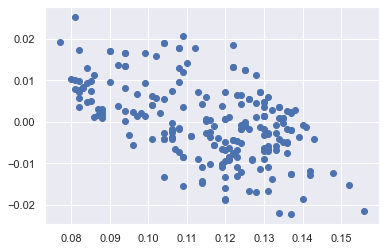

In [67]:
plt.plot(asthmavalue, error1, 'o')

In [34]:
## NEURAL NETWORK (MODEL 1) ##

In [35]:
trainFraction = 0.75
sample1 = np.random.uniform(size = 220) < trainFraction
trainingDat1 = x_model1[sample1]
testingDat1 = x_model1[~sample1]

In [36]:
x_model1 = torch.from_numpy(x_model1.values)
y_model1 = torch.from_numpy(y_model1.values)

In [37]:
x_model1 = x_model1.float()
y_model1 = y_model1.float()

In [38]:
x1train = x_model1[sample1]
x1test = x_model1[~sample1]
y1train = y_model1[sample1]
y1test = y_model1[~sample1]

In [39]:
x2train.shape

torch.Size([161, 2])

In [40]:
# 2 hidden nodes

neural_model1 = torch.nn.Sequential(
    torch.nn.Linear(3, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn1 = torch.nn.MSELoss(reduction='mean')
optimizer1 = torch.optim.SGD(neural_model1.parameters(), lr=1e-8)

learning_rate = 1e-12
for t in range(1000):
    y_pred1 = neural_model1(x1train)
    loss1 = loss_fn1(y_pred1, y1train)
    if t % 100 == 0:
        print(t, loss1.item())
    neural_model1.zero_grad()
    loss1.backward()
    optimizer1.step()

/Users/xiang/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([171])) that is different to the input size (torch.Size([171, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 0.028968187049031258
100 0.02896806225180626
200 0.02896793559193611
300 0.028967812657356262
400 0.028967684134840965
500 0.028967557474970818
600 0.02896743267774582
700 0.028967304155230522
800 0.028967179358005524
900 0.028967056423425674


In [41]:
y_pred1_test = neural_model1(x1test)
loss_test1 = loss_fn1(y_pred1_test, y1test)
print(loss_test1.item())

0.029023442417383194


/Users/xiang/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [11]:
## LINEAR REGRESSION (MODEL 2) WITHOUT COLLINEARITY ##
# variables: svi_ptile , transit_ptile 

In [12]:
y_model2 = df['asthmavalue']
x_model2 = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)
fit2 = LinearRegression().fit(x_model2, y_model2)
yhat2 = fit2.predict(x_model2)
[fit2.intercept_,fit2.coef_]

[0.08615421688143492, array([0.04810285, 0.00918508])]

In [13]:
x_model2

,svi_ptile,transit_ptile
0,0.045690,0.029276
3,0.015230,0.124807
7,0.005076,0.036980
9,0.076140,0.033898
11,0.081220,0.101695
...,...,...
635,0.208100,0.805855
640,0.360400,0.998459
642,0.213200,0.257319
647,0.832500,0.445300


In [14]:
b1_model2 = fit1.coef_[0]
b2_model2 = fit1.coef_[1]
intercept2 = fit2.intercept_
print(b1_model2, b2_model2)

0.04846093385797968 0.007471326285174193


In [15]:
results2 = smf.ols('asthmavalue ~ svi_ptile + transit_ptile', data = df).fit()
print(results2.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.719     
Dependent Variable: asthmavalue      AIC:                -1428.6480
Date:               2022-05-12 15:03 BIC:                -1418.4671
No. Observations:   220              Log-Likelihood:     717.32    
Df Model:           2                F-statistic:        280.9     
Df Residuals:       217              Prob (F-statistic): 6.15e-61  
R-squared:          0.721            Scale:              8.7377e-05
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0862    0.0015  58.8876  0.0000  0.0833  0.0890
svi_ptile          0.0481    0.0023  20.5925  0.0000  0.0435  0.0527
transit_ptile      0.0092    0.0023   4.0796  0.0001  0.0047  0.0136
------------------------------------------------------------

In [16]:
error2 = yhat2 - y_model2
error2

0      0.001621
3      0.006033
7      0.004738
9      0.009128
11     0.007995
         ...   
635   -0.010434
640   -0.006339
642   -0.015227
647    0.006290
649   -0.000597
Name: asthmavalue, Length: 220, dtype: float64

In [43]:
(error2**2).mean()

8.618587951120237e-05

In [18]:
## NEURAL NETWORK (MODEL 2) ##

In [19]:
trainFraction = 0.75
sample2 = np.random.uniform(size = 220) < trainFraction
trainingDat2 = x_model2[sample2]
testingDat2 = x_model2[~sample2]

In [20]:
x_model2 = torch.from_numpy(x_model2.values)
y_model2 = torch.from_numpy(y_model2.values)

In [21]:
x_model2 = x_model2.float()
y_model2 = y_model2.float()

In [22]:
x2train = x_model2[sample2]
x2test = x_model2[~sample2]
y2train = y_model2[sample2]
y2test = y_model2[~sample2]

In [25]:
x2train.shape

torch.Size([161, 2])

In [49]:
# 2 hidden nodes

neural_model2 = torch.nn.Sequential(
    torch.nn.Linear(2, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, 1),
)

loss_fn2 = torch.nn.MSELoss(reduction='mean')
optimizer2 = torch.optim.SGD(neural_model2.parameters(), lr=1e-8)

learning_rate = 1e-10
for t in range(1000):
    y_pred2 = neural_model2(x2train)
    loss2 = loss_fn2(y_pred2, y2train)
    if t % 100 == 0:
        print(t, loss2.item())
    neural_model2.zero_grad()
    loss2.backward()
    optimizer2.step()

0 0.005017189309000969
100 0.005017189309000969
200 0.005017188377678394
300 0.005017189309000969
400 0.005017188377678394
500 0.005017188377678394
600 0.005017188377678394
700 0.005017188377678394
800 0.005017188377678394
900 0.005017187912017107


In [29]:
# loss is slowly decreasing

In [44]:
y_pred2_test = neural_model2(x2test)
loss_test2 = loss_fn2(y_pred2_test, y2test)
print(loss_test2.item())

0.46264031529426575


In [45]:
## Error Rates Comparison

### Model 1 LR: 8.508677689764922e-05
### Model 1 NN (2 nodes):0.029023442417383194

### Model 2 LR: 8.618587951120237e-05
### Model 2 NN (2 nodes): 0.46264031529426575

In [ ]:
def getRow(ct):
    row = df.loc[ct]
    return row

def getOutcome(row):
    # get inputs from df depending on ct
    X1 = 
    X2 = 
    X3 = 
    y_output = intercept + b1(X1) + b2(X2) + b3(X3)
    return y_output

In [86]:
x_model_test_collinearity = df.drop(['ct', 'asthmavalue', 'lungCAvalue', 'CADvalue', 'LBWvalue', 'No_of_Stops', 'PTover45m_pct', 'PTRAF_bycensus'], axis=1)
fit_testcoll = LinearRegression().fit(x_model_test_collinearity, y)
yhat_testcoll = fit_testcoll.predict(x_model_test_collinearity)

results_testcoll = smf.ols('asthmavalue ~ svi_ptile + transit_ptile', data = df).fit()
print(results_testcoll.summary2())
[fit_testcoll.intercept_,fit_testcoll.coef_]

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.719     
Dependent Variable: asthmavalue      AIC:                -1428.6480
Date:               2022-05-06 14:35 BIC:                -1418.4671
No. Observations:   220              Log-Likelihood:     717.32    
Df Model:           2                F-statistic:        280.9     
Df Residuals:       217              Prob (F-statistic): 6.15e-61  
R-squared:          0.721            Scale:              8.7377e-05
--------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept          0.0862    0.0015  58.8876  0.0000  0.0833  0.0890
svi_ptile          0.0481    0.0023  20.5925  0.0000  0.0435  0.0527
transit_ptile      0.0092    0.0023   4.0796  0.0001  0.0047  0.0136
------------------------------------------------------------

[0.08615421688143492, array([0.04810285, 0.00918508])]